In [1]:
import os, sys
import numpy as np
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt

import PulseTriggeringTools as ptt
import TimestreamHelperFunctions as Thf

In [2]:
def DrawGauss(ax, mu, sig, amp):
    xlim  = ax.get_xlim()
    xvals = np.linspace(xlim[0], xlim[1], 200)
#     yvals = (1./(np.sqrt(2.*np.pi)*sig)) * np.exp(-0.5*np.power((xvals-mu)/sig,2))
    yvals = amp * np.exp(-0.5*np.power((xvals-mu)/sig,2))
    ax.plot(xvals,yvals,'r')
    ax.set_xlim(xlim)

In [3]:
%matplotlib notebook

In [4]:
## Define the runs of interest
run_dict = {"series": [
    "20220721_123409",
    "20220721_123710",
    "20220721_124011",
    "20220720_150715",
    "20220720_150540",
    "20220720_144600",
    "20220720_150408",
    "20220720_150240",
    "20220720_150108",
    "20220720_145935",
    "20220720_144037" ] , 
            "Vled"  : [
    4.0,
    3.8,
    3.6,
    3.4,
    3.2,
    3.0,
    3.8,
    2.6,
    2.4,
    2.2,
    2.0 ] }
run_df = pd.DataFrame(run_dict)
run_df

,series,Vled
0,20220721_123409,4.0
1,20220721_123710,3.8
2,20220721_124011,3.6
3,20220720_150715,3.4
4,20220720_150540,3.2
5,20220720_144600,3.0
6,20220720_150408,3.8
7,20220720_150240,2.6
8,20220720_150108,2.4
9,20220720_145935,2.2


In [4]:
# series    = '20220715_143419'
# series    = run_df['series'].loc[run_df['Vled']==4.0][0]
series    = '20220706_181335'
data_path = os.path.join('/data/USRP_Noise_Scans',series.split('_')[0],series)

In [5]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series, verbose=True)

Line Delay file:  /data/USRP_Noise_Scans/20220706/20220706_181335/USRP_Delay_20220706_181335.h5
VNA scan file:    /data/USRP_Noise_Scans/20220706/20220706_181335/USRP_VNA_20220706_181335.h5
Timestream files: ['/data/USRP_Noise_Scans/20220706/20220706_181335/USRP_Noise_20220706_181335_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220706/20220706_181335/noise_averages_20220706_181335.h5


# Phase Response

Line Delay file:  /data/USRP_Noise_Scans/20220706/20220706_181335/USRP_Delay_20220706_181335.h5
VNA scan file:    /data/USRP_Noise_Scans/20220706/20220706_181335/USRP_VNA_20220706_181335.h5
Timestream files: ['/data/USRP_Noise_Scans/20220706/20220706_181335/USRP_Noise_20220706_181335_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220706/20220706_181335/noise_averages_20220706_181335.h5
Pulse count: 34


<IPython.core.display.Javascript object>


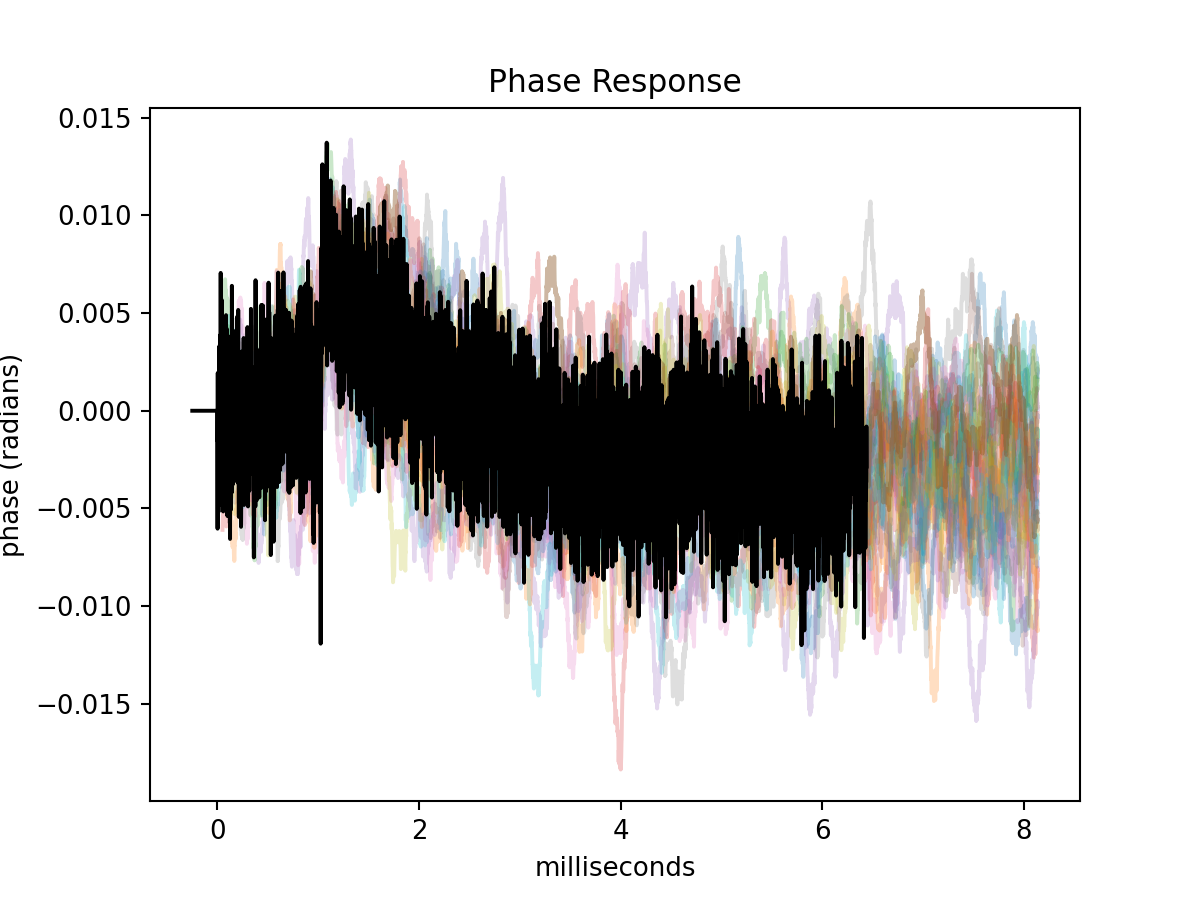

In [7]:
pulseCount, traces = ptt.GetResponse(series, trig_channel="Phase", 
                                     traceLength=8192, trig_th=5.0e3, tauFall=500e-6, mean_pre_samps=800, 
                                     doAlign = False, verbose=True, show_plots=True)

In [ ]:
# %matplotlib inline
pulse_heights, taus = ptt.CalcPulseParams(traces)

med_ph_phase  = np.median(pulse_heights)
sig_ph_phase  = np.std(pulse_heights)
med_tau_phase = np.median(taus)
sig_tau_phase = np.std(taus)

# height_bins = np.linspace(0.1,4.1,30)
plt.figure()
cts, bins, edges = plt.hist(pulse_heights)#,bins=height_bins)
# plt.xlabel('Magnitude Response: Pulse Height')
plt.xlabel('Phase Respone: Pulse Height [radians]')
plt.title('# of pulses = '+str(len(traces)))
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.plot( med_ph_phase*np.ones(2) , ylim , 'r--')
DrawGauss(plt.gca(), med_ph_phase, sig_ph_phase, np.max(cts))
plt.gca().set_xlim(xlim)
plt.gca().set_ylim(ylim)
# plt.savefig('pulse_heights.png')


plt.figure()
plt.xlabel('"tau" in microseconds')
plt.title('histogram of "taus"')
cts, bins, edges = plt.hist(taus,bins=25)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.plot( med_tau_phase*np.ones(2) , ylim , 'r--')
DrawGauss(plt.gca(), med_tau_phase, sig_tau_phase, np.max(cts))
plt.gca().set_xlim(xlim)
plt.gca().set_ylim(ylim)
# plt.savefig('pulse_lifetimes.png')

# Magnitude Response

In [ ]:
pulseCount, traces = ptt.GetResponse(series, trig_channel="Magnitude", 
                                     traceLength=4096, trig_th=1.0e4, tauFall=500e-6, mean_pre_samps=800, 
                                     doAlign = False, verbose=True, show_plots=True)

In [ ]:
# %matplotlib inline
pulse_heights, taus = ptt.CalcPulseParams(traces)

med_ph_mag  = np.median(pulse_heights)
sig_ph_mag  = np.std(pulse_heights)
med_tau_mag = np.median(taus)
sig_tau_mag = np.std(taus)

# height_bins = np.linspace(0.1,4.1,30)
plt.figure()
cts, bins, edges = plt.hist(pulse_heights)#,bins=height_bins)
plt.xlabel('Magnitude Response: Pulse Height')
plt.title('# of pulses = '+str(len(traces)))
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.plot( med_ph_mag*np.ones(2) , ylim , 'r--')
DrawGauss(plt.gca(), med_ph_mag, sig_ph_mag, np.max(cts))
plt.gca().set_xlim(xlim)
plt.gca().set_ylim(ylim)
# plt.savefig('pulse_heights.png')

plt.figure()
plt.xlabel('"tau" in microseconds')
plt.title('histogram of "taus"')
cts, bins, edges = plt.hist(taus,bins=25)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.plot( med_tau_mag*np.ones(2) , ylim , 'r--')
DrawGauss(plt.gca(), med_tau_mag, sig_tau_mag, np.max(cts))
plt.gca().set_xlim(xlim)
plt.gca().set_ylim(ylim)
# plt.savefig('pulse_lifetimes.png')

# plt.figure('interesting pulse heights')
# plt.hist(interestingPulseHeights,bins = height_bins)
# plt.xlabel('radians')
# plt.title('only plotting taus between 200 and 600 microseconds')
# plt.savefig('pulse_heights_lifetime_cut.png')
# plt.show()